### Übungsblatt 5 - Rubin Mehralivand, Luis Schneck

In [233]:
import numpy as np
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
import scipy

In [234]:
class Einschrittmethode(ABC):
    def __init__(self, f: callable, t0: float, u0: float, t_end: float):
        self.f = f
        self.t0 = t0
        self.u0 = u0
        self.t_end = t_end

    @abstractmethod
    def step(self, h: float):
        pass

    def integrate(self, h: float) -> tuple:
        n = int(self.t_end/h)
        ts = np.zeros(n)
        ys = np.zeros(n)
        ys[0] = self.u0
        ts[0] = self.t0

        for i in range(1, n):
            self.step(h)
            ys[i] = self.u0
            ts[i] = self.t0

        return ts, ys

In [235]:
class Eulerverfahren(Einschrittmethode):
    def step(self, h: float):
        self.u0 += h * self.f(self.t0, self.u0)
        self.t0 += h

In [236]:
class ImpliziterEuler(Einschrittmethode):
    def step(self, h: float):
        self.t0 += h

        def newton(u_next: float):
            return u_next - self.u0 - h * self.f(self.t0, u_next)

        u_test = np.array([self.u0])    # Konversion zu (nd-)array um Warnings zu vermeiden
        self.u0 = scipy.optimize.fsolve(newton, u_test)

In [237]:
class Heun(Einschrittmethode):
    def step(self, h: float):
        u_euler = self.u0 + h * f(self.t0, self.u0)
        self.u0 += (h/2) * (f(self.t0, self.u0) + f(self.t0 + h, u_euler))
        self.t0 += h

In [238]:
class Trapezregel(Einschrittmethode):
    def step(self, h: float):
        u_euler = self.f(self.t0, self.u0)

        def newton(u_next: float):
            return u_next - self.u0 - (h/2) * (u_euler + self.f(self.t0 + h, u_next))

        u_test = np.array([self.u0])
        self.u0 = scipy.optimize.fsolve(newton, u_test)
        self.t0 += h

In [239]:
def f(t: float, y: float):
    return -y + np.sin(t)

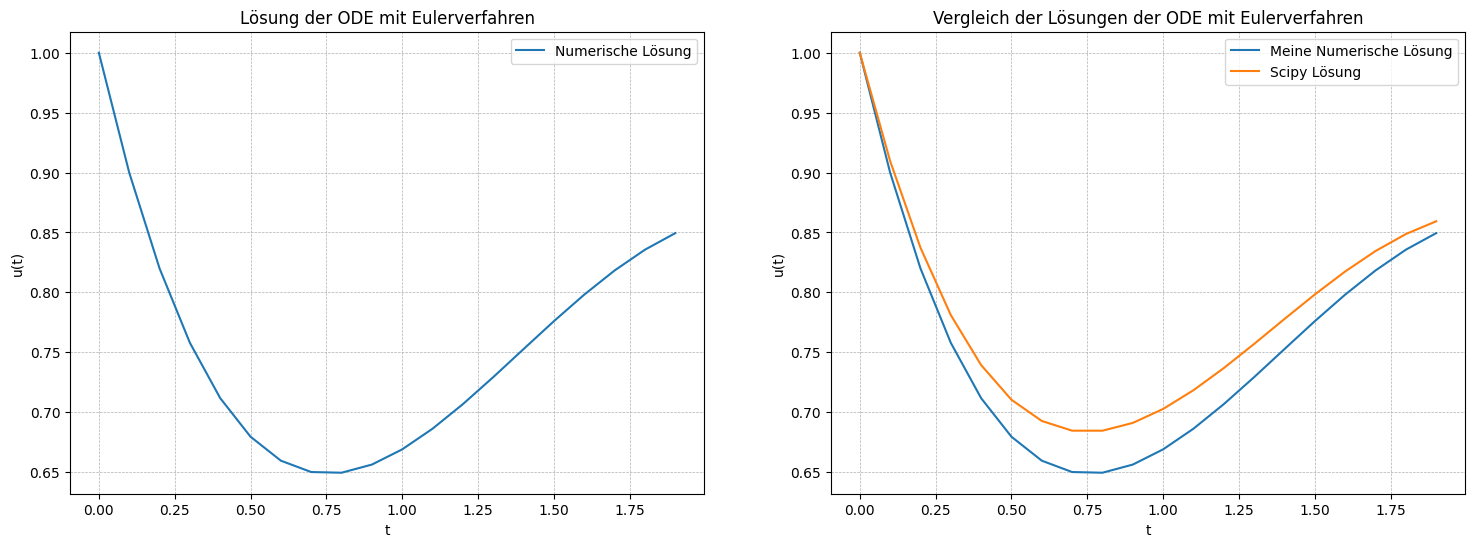

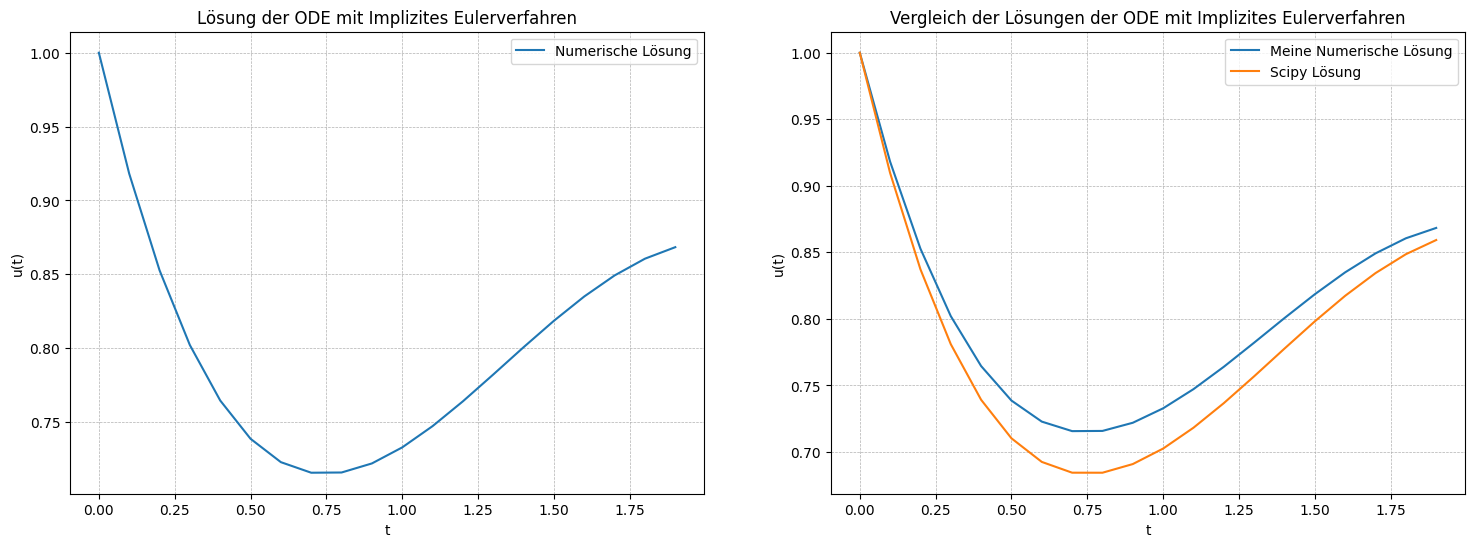

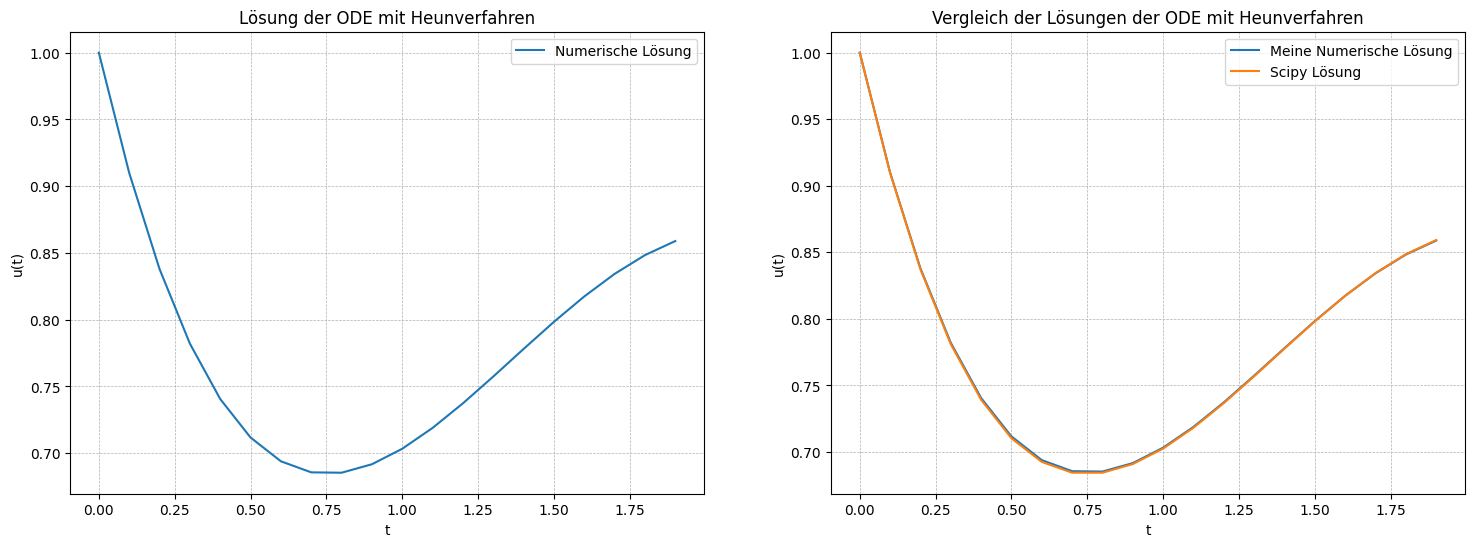

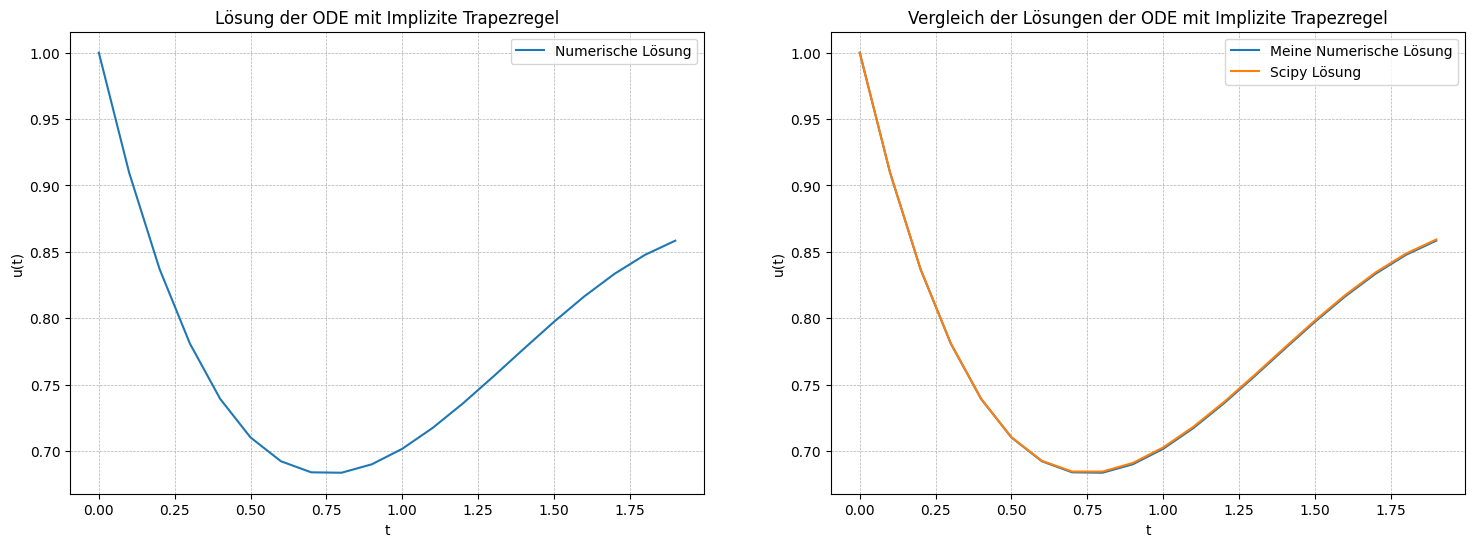

In [240]:
solutions = {
    'Name': ['Eulerverfahren', 'Implizites Eulerverfahren', 'Heunverfahren', 'Implizite Trapezregel'],
    'Methode': [Eulerverfahren(f, 0, 1, 2), ImpliziterEuler(f, 0, 1, 2), Heun(f, 0, 1, 2), Trapezregel(f, 0, 1, 2)],
    't': [],
    'y': [],
}

def prepare_plot():
    global solutions
    n = 4
    h = 0.1

    for i in range (0,n):
        method = solutions['Methode'][i]
        sol_tuple = method.integrate(h)
        solutions['t'].append(sol_tuple[0])
        solutions['y'].append(sol_tuple[1])


prepare_plot()
sol = scipy.integrate.solve_ivp(f, [0,2], [1], t_eval=solutions['t'][0])   # Als Vergleich

for i in range (0,4):
    plt.figure(figsize=(18, 6))
    plt.subplot(1,2,1)
    plt.plot(solutions['t'][i], solutions['y'][i], label='Numerische Lösung')
    plt.xlabel("t")
    plt.ylabel("u(t)")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.title("Lösung der ODE mit " + solutions['Name'][i])

    plt.subplot(1,2,2)
    plt.plot(solutions['t'][i], solutions['y'][i], label='Meine Numerische Lösung')
    plt.plot(sol['t'], sol['y'][0], label="Scipy Lösung")
    plt.xlabel("t")
    plt.ylabel("u(t)")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.title("Vergleich der Lösungen der ODE mit " + solutions['Name'][i])
    plt.show()